<a href="https://colab.research.google.com/github/1BM23CS345/6Sem_ML_Lab/blob/main/LAB_2_PREPROCESSING_TECHNIQUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pandas matplotlib seaborn

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"

housing = pd.read_csv(url)

print("Dataset loaded successfully!")


Dataset loaded successfully!


In [4]:

print("First 10 rows:\n")
print(housing.head(10))

print("\nData Types:\n")
print(housing.dtypes)


First 10 rows:

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  


In [10]:
stats = housing.describe().T
stats["median"] = housing.median(numeric_only=True)
stats = stats[["mean", "median", "std", "min", "max"]]

print("Basic Statistics:\n")
print(stats)

Basic Statistics:

                             mean       median            std         min  \
longitude             -119.569704    -118.4900       2.003532   -124.3500   
latitude                35.631861      34.2600       2.135952     32.5400   
housing_median_age      28.639486      29.0000      12.585558      1.0000   
total_rooms           2635.763081    2127.0000    2181.615252      2.0000   
total_bedrooms         537.870553     435.0000     421.385070      1.0000   
population            1425.476744    1166.0000    1132.462122      3.0000   
households             499.539680     409.0000     382.329753      1.0000   
median_income            3.870671       3.5348       1.899822      0.4999   
median_house_value  206855.816909  179700.0000  115395.615874  14999.0000   

                            max  
longitude             -114.3100  
latitude                41.9500  
housing_median_age      52.0000  
total_rooms          39320.0000  
total_bedrooms        6445.0000  
popula

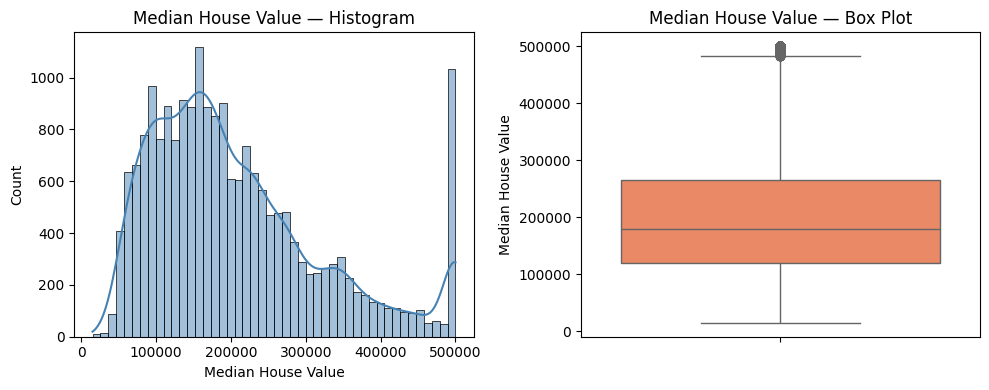

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(housing["median_house_value"], kde=True, color="steelblue")
plt.title("Median House Value — Histogram")
plt.xlabel("Median House Value")

plt.subplot(1, 2, 2)
sns.boxplot(y=housing["median_house_value"], color="coral")
plt.title("Median House Value — Box Plot")
plt.ylabel("Median House Value")

plt.tight_layout()
plt.show()


In [9]:
missing_counts = housing.isnull().sum()
missing_perc = (missing_counts / len(housing)) * 100
missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_perc
}).sort_values(by="missing_percent", ascending=False)

print("Missing Data Summary:\n")
print(missing_summary)


Missing Data Summary:

                    missing_count  missing_percent
total_bedrooms                207         1.002907
longitude                       0         0.000000
latitude                        0         0.000000
housing_median_age              0         0.000000
total_rooms                     0         0.000000
population                      0         0.000000
households                      0         0.000000
median_income                   0         0.000000
median_house_value              0         0.000000
ocean_proximity                 0         0.000000


In [11]:
median_total_bedrooms = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)

print(f"Median of total_bedrooms: {median_total_bedrooms}")
print(f"Missing values in total_bedrooms after imputation: {housing['total_bedrooms'].isnull().sum()}")

Median of total_bedrooms: 435.0
Missing values in total_bedrooms after imputation: 0


/tmp/ipython-input-1225159489.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)


In [13]:
median_total_bedrooms = housing["total_bedrooms"].median()
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median_total_bedrooms)

print(f"Median of total_bedrooms: {median_total_bedrooms}")
print(f"Missing values in total_bedrooms after imputation: {housing['total_bedrooms'].isnull().sum()}")

Median of total_bedrooms: 435.0
Missing values in total_bedrooms after imputation: 0


In [14]:
housing_one_hot_encoded = pd.get_dummies(housing['ocean_proximity'], prefix='ocean_proximity', drop_first=True)
housing = pd.concat([housing, housing_one_hot_encoded], axis=1)
housing.drop('ocean_proximity', axis=1, inplace=True)

print("First 5 rows of the housing DataFrame after one-hot encoding:\n")
print(housing.head())
print("\nUpdated columns in the housing DataFrame:\n")
print(housing.columns)

First 5 rows of the housing DataFrame after one-hot encoding:

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   Fa

In [15]:
from sklearn.preprocessing import MinMaxScaler
print("MinMaxScaler imported successfully.")

MinMaxScaler imported successfully.


In [16]:
numeric_cols = housing.select_dtypes(include=['number', 'bool']).columns

scaler = MinMaxScaler(feature_range=(0, 1))

housing[numeric_cols] = scaler.fit_transform(housing[numeric_cols])

print("Descriptive statistics of scaled numerical features:")
print(housing[numeric_cols].describe())

Descriptive statistics of scaled numerical features:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean       0.476125      0.328572            0.541951      0.066986   
std        0.199555      0.226988            0.246776      0.055486   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.253984      0.147715            0.333333      0.036771   
50%        0.583665      0.182784            0.549020      0.054046   
75%        0.631474      0.549416            0.705882      0.080014   
max        1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean         0.083153      0.039869      0.081983       0.232464   
std          0.065083      0.031740      0.062873       0.131020   
min          0.000000      0.000000

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

print("StratifiedShuffleSplit and numpy imported successfully.")

StratifiedShuffleSplit and numpy imported successfully.


In [18]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    housing_train = housing.loc[train_index]
    housing_test = housing.loc[test_index]

housing_train.drop("income_cat", axis=1, inplace=True)
housing_test.drop("income_cat", axis=1, inplace=True)

print("Dataset split into training and testing sets successfully.")
print(f"Training set shape: {housing_train.shape}")
print(f"Testing set shape: {housing_test.shape}")


Dataset split into training and testing sets successfully.
Training set shape: (16512, 13)
Testing set shape: (4128, 13)


/tmp/ipython-input-3992704249.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [19]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"] = housing["income_cat"].where(housing["income_cat"] < 5, 5.0)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    housing_train = housing.loc[train_index]
    housing_test = housing.loc[test_index]

housing_train = housing_train.drop("income_cat", axis=1)
housing_test = housing_test.drop("income_cat", axis=1)

print("Dataset split into training and testing sets successfully.")
print(f"Training set shape: {housing_train.shape}")
print(f"Testing set shape: {housing_test.shape}")

Dataset split into training and testing sets successfully.
Training set shape: (16512, 13)
Testing set shape: (4128, 13)


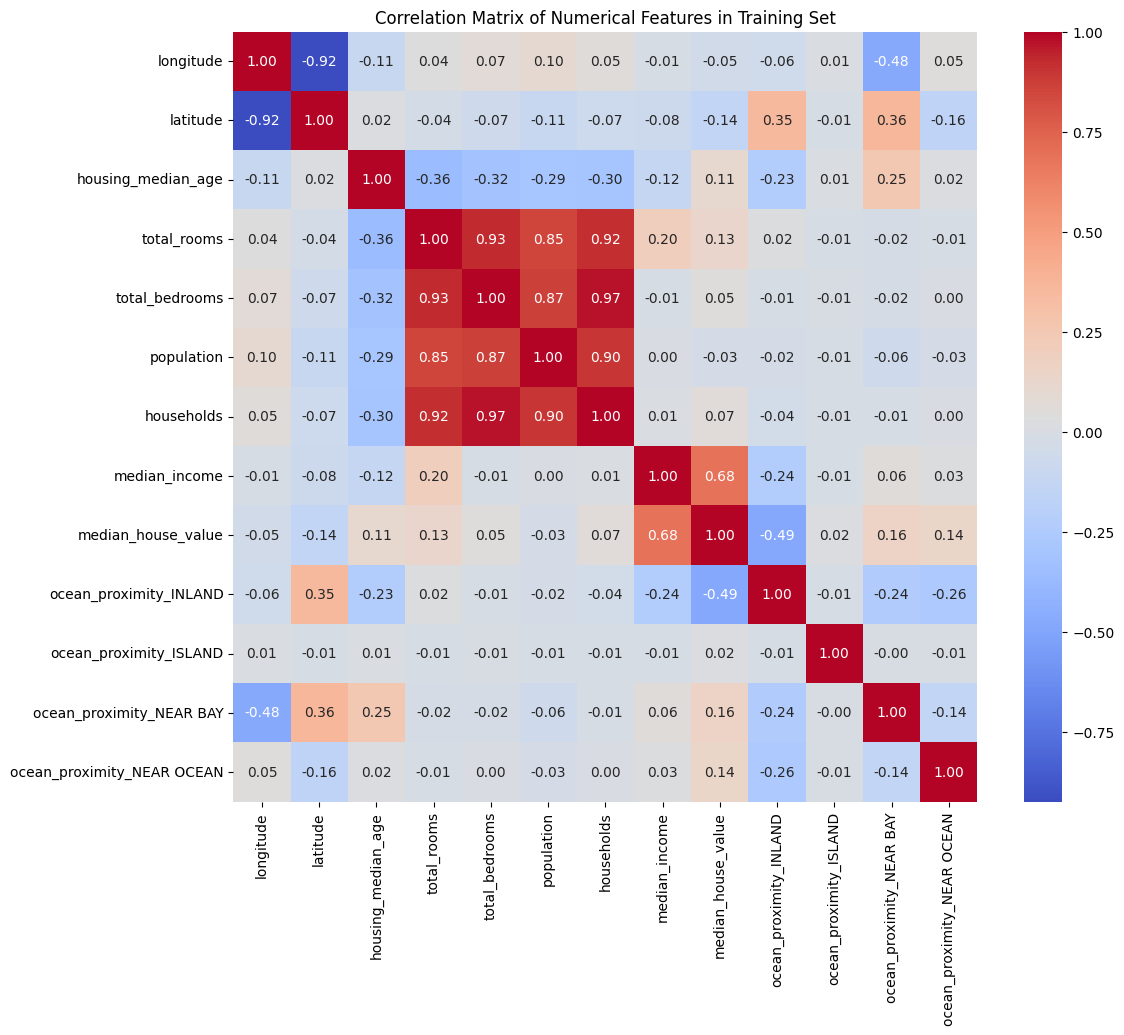

In [20]:
numeric_features_train = housing_train.select_dtypes(include=np.number)
correlation_matrix = numeric_features_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features in Training Set')
plt.show()

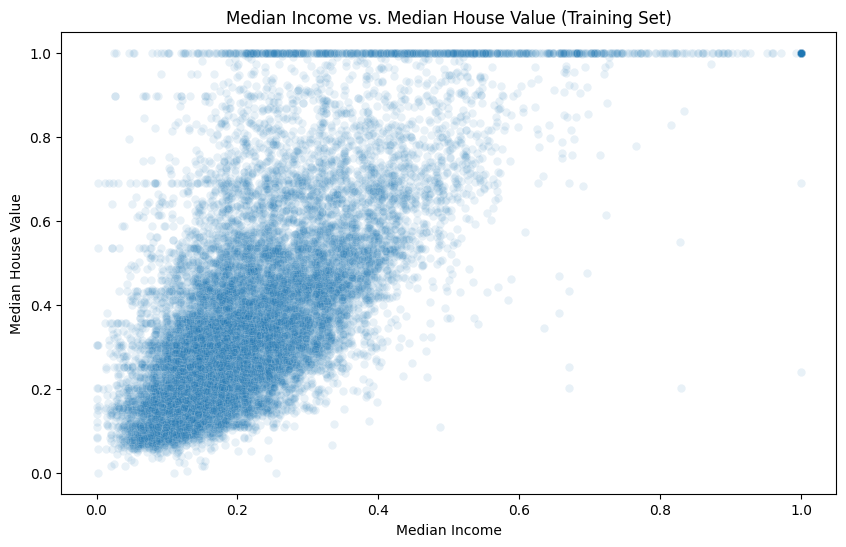

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=housing_train, alpha=0.1)
plt.title('Median Income vs. Median House Value (Training Set)')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets successfully using random sampling.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets successfully using random sampling.
X_train shape: (16512, 13)
X_test shape: (4128, 13)
y_train shape: (16512,)
y_test shape: (4128,)


In [23]:
correlation_with_target = correlation_matrix['median_house_value'].sort_values(ascending=False)

print("Correlation with Median House Value (Sorted):")
print(correlation_with_target)


top_3_positive = correlation_with_target[1:4]


most_negative = correlation_with_target.tail(1)

print("\nTop 3 Most Positively Correlated Features with 'median_house_value':")
print(top_3_positive)

print("\nMost Negatively Correlated Feature with 'median_house_value':")
print(most_negative)

Correlation with Median House Value (Sorted):
median_house_value            1.000000
median_income                 0.684522
ocean_proximity_NEAR BAY      0.163476
ocean_proximity_NEAR OCEAN    0.138811
total_rooms                   0.134857
housing_median_age            0.108507
households                    0.066748
total_bedrooms                0.051847
ocean_proximity_ISLAND        0.022079
population                   -0.025470
longitude                    -0.047032
latitude                     -0.142891
ocean_proximity_INLAND       -0.486256
Name: median_house_value, dtype: float64

Top 3 Most Positively Correlated Features with 'median_house_value':
median_income                 0.684522
ocean_proximity_NEAR BAY      0.163476
ocean_proximity_NEAR OCEAN    0.138811
Name: median_house_value, dtype: float64

Most Negatively Correlated Feature with 'median_house_value':
ocean_proximity_INLAND   -0.486256
Name: median_house_value, dtype: float64


In [24]:
from sklearn.preprocessing import StandardScaler

print("StandardScaler imported successfully.")

StandardScaler imported successfully.


In [25]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("X_train_scaled head:\n", X_train_scaled.head())
print("\nX_test_scaled head:\n", X_test_scaled.head())

X_train_scaled head:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1.272587 -1.372811            0.348490     0.222569        0.211228   
1   0.709162 -0.876696            1.618118     0.340293        0.593094   
2  -0.447603 -0.460146           -1.952710    -0.342597       -0.495226   
3   1.232698 -1.382172            0.586545    -0.561490       -0.409306   
4  -0.108551  0.532084            1.142008    -0.119565       -0.256559   

   population  households  median_income  ocean_proximity_INLAND  \
0    0.768276    0.322906      -0.326196               -0.680574   
1   -0.098901    0.672027      -0.035843               -0.680574   
2   -0.449818   -0.430461       0.144701               -0.680574   
3   -0.007434   -0.380587      -1.017864               -0.680574   
4   -0.485877   -0.314962      -0.171488                1.469348   

   ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0               -0.015566                 -0.355646   
1       

In [26]:
from sklearn.linear_model import LinearRegression

print("LinearRegression imported successfully.")

LinearRegression imported successfully.


In [27]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [28]:
y_pred = model.predict(X_test_scaled)

print("Predictions on test set generated successfully.")
print(f"First 5 predictions: {y_pred[:5]}")

Predictions on test set generated successfully.
First 5 predictions: [0.08013801 0.22469799 0.49566671 0.52165485 0.51067161]


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

RMSE: 0.1442
MAE: 0.1044
R2 Score: 0.6269
